<a href="https://colab.research.google.com/github/jafar-albadarneh/machine-learning/blob/master/Covid19_US_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
covid_input_file = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
covid_data = pd.read_csv(covid_input_file, header=0, index_col='date', parse_dates=True) 
print(covid_data.head(1))

               county       state     fips  cases  deaths
date                                                     
2020-01-21  Snohomish  Washington  53061.0      1       0


In [0]:
# Ploting method
def plot_timeseries(axes, x, y, color, xlabel, ylabel, label = '', linestyle = '--', marker='o'):
  # Plot the inputs x,y with color attribute
  axes.plot(x, y, color=color, linestyle=linestyle, marker=marker, label=label)
  # Set the x-axis label
  axes.set_xlabel(xlabel)
  # rotate x-tick labels
  axes.set_xticklabels(x, rotation=90)
  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)
  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

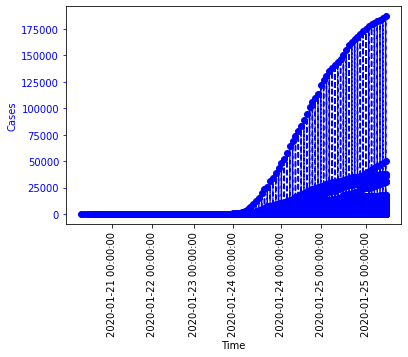

In [51]:
# Visualize data
fig1, ax1 = plt.subplots()
plot_timeseries(ax1,covid_data.index, covid_data.cases, 'blue','Time', 'Cases')
plt.show()

In [53]:
#resample weekly
weekly_summary = pd.DataFrame()
weekly_summary['cases'] = covid_data[covid_data.state == 'New York']['cases'].resample('W').sum()
weekly_summary['deaths'] = covid_data[covid_data.state == 'New York']['deaths'].resample('W').sum() 
print("Cases in new york city \n {}".format(weekly_summary))

Cases in new york city 
               cases  deaths
date                       
2020-03-01        1       0
2020-03-08      275       0
2020-03-15     2621       8
2020-03-22    41545     404
2020-03-29   276824    4022
2020-04-05   665213   21271
2020-04-12  1137735   64803
2020-04-19  1566815  109012
2020-04-26  1893096  141200
2020-05-03  2165499  164399
2020-05-10  1649156  128574


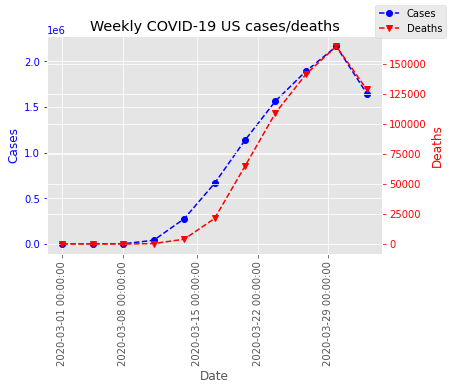

In [63]:
# Visualize weekly chart
# (use in case : covid_data.groupby('state') since the resulting sample is a multi-index, we need to unstack the dataframe
# weekly_summary = weekly_summary.unstack(level=0)
plt.style.use('ggplot')
fig, ax = plt.subplots()
plot_timeseries(ax, weekly_summary.index, weekly_summary.cases, color='blue', xlabel='Date',ylabel='Cases', label='Cases')
ax2 = ax.twinx()
plot_timeseries(ax2, weekly_summary.index, weekly_summary.deaths, color='red', xlabel='Date',ylabel='Deaths', label='Deaths', marker='v', linestyle='--')
ax.set_title('Weekly COVID-19 US cases/deaths')
fig.legend()
plt.show()

fips      107575947.0
cases       9398780.0
deaths       633693.0
Name: New York, dtype: float64


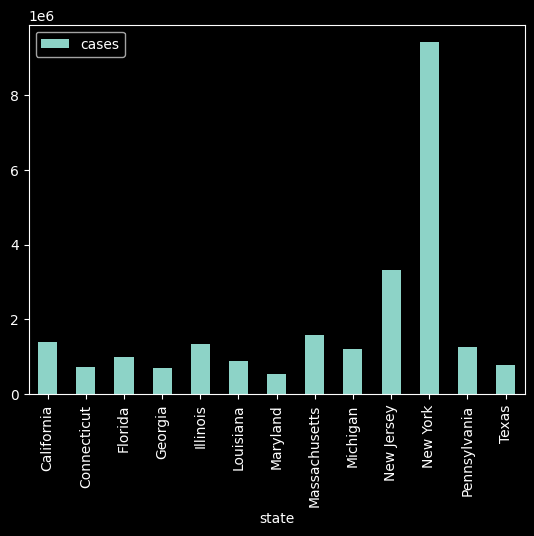

In [68]:
plt.style.use('dark_background')
grouped_by_state = covid_data.groupby('state').sum()
print(grouped_by_state.loc['New York'])
grouped_by_state[grouped_by_state.cases >= 500000].plot(kind='bar', y='cases')
plt.show()

In [66]:
#resample monthly
monthly_summary = pd.DataFrame()
monthly_summary['cases'] = covid_data.groupby('state').cases.resample('M').sum()
monthly_summary['deaths'] = covid_data.groupby('state').deaths.resample('M').sum()
print(monthly_summary.head(1), monthly_summary.tail(1)) 
monthly_summary = monthly_summary.unstack(level=0)

                    cases  deaths
state   date                     
Alabama 2020-03-31   6129      42                     cases  deaths
state   date                     
Wyoming 2020-05-31   4841      56


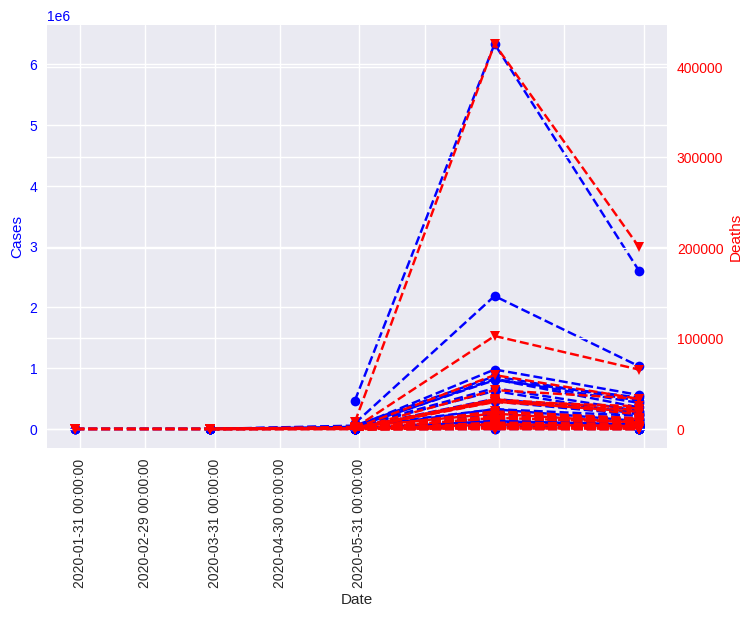

In [72]:
# Visualize weekly chart
plt.style.use('seaborn-colorblind')
fig, ax = plt.subplots()
plot_timeseries(ax, monthly_summary.index, monthly_summary.cases, color='blue', xlabel='Date',ylabel='Cases')
ax2 = ax.twinx()
plot_timeseries(ax2, monthly_summary.index, monthly_summary.deaths, color='red', xlabel='Date',ylabel='Deaths', marker='v', linestyle='--')
plt.show()